<a href="https://colab.research.google.com/github/gr3ybr0w/cookbook/blob/master/pandas/analysis/Lorenz_Curve_and_Gini_Coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In economics, the Lorenz curve is a graphical representation of the distribution of income or of wealth. It was developed by Max O. Lorenz in 1905 for representing inequality of the wealth distribution.

The curve is a graph showing the proportion of overall income or wealth assumed by the bottom x% of the people, although this is not rigorously true for a finite population (see below). It is often used to represent income distribution, where it shows for the bottom x% of households, what percentage (y%) of the total income they have. The percentage of households is plotted on the x-axis, the percentage of income on the y-axis. It can also be used to show distribution of assets. In such use, many economists consider it to be a measure of social inequality.

The concept is useful in describing inequality among the size of individuals in ecology[1] and in studies of biodiversity, where the cumulative proportion of species is plotted against the cumulative proportion of individuals.[2] It is also useful in business modeling: e.g., in consumer finance, to measure the actual percentage y% of delinquencies attributable to the x% of people with worst risk scores.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# ensure your arr is sorted from lowest to highest values first!
arr = np.array([1,4,6,9,100])

0.6766666666666667


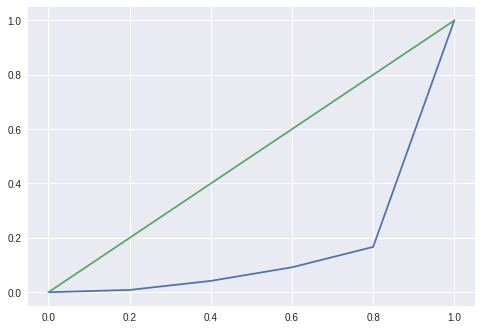

In [4]:
def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()